# Distance Map

**build upon 10m mask**

**create file all_masks_10mdist**

Step 1. DistanceTransform

Step 2. Truncate the distance 

Step 3. Digitized the map

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
import os
import re
mask_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_masks_10m6b'
frame_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_frames_5m6b'

masks_files = os.listdir(mask_dir)
masks_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])
frames_files = os.listdir(frame_dir)
frames_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])

# create new folder
save_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_masks_10m10c'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [3]:
def load_mask(i):
    return np.load(os.path.join(mask_dir,masks_files[i]))

In [7]:
from scipy import ndimage
def create_distance_map(mask, bins, plot=False, R=5.5):
    dst = ndimage.distance_transform_edt(mask)

    # truncate it with threshold R
    trun_dst = np.where(dst>R, R, dst)
    
    print('dst:',np.min(dst),np.max(dst))
    print('trun_dst:',np.min(trun_dst),np.max(trun_dst))
    
    #digitize it
    quan_dist = np.digitize(trun_dst, bins, right=True)
    
    if(plot):
        d = plt.figure(1)
        plt.title('binary map')
        frame0 = plt.imshow(mask,cmap='gray',)
        
        a = plt.figure(2)
        plt.title('distance map')
        frame1 = plt.imshow(dst,cmap='gray',)

        b = plt.figure(3)
        plt.title('truncated distance map')
        frame2 = plt.imshow(trun_dst,cmap='gray')
        c = plt.figure(4)
        plt.title('digitized distance map')
        frame3 = plt.imshow(quan_dist,cmap='gray')
        print('unique:',np.unique(quan_dist))

        plt.show()
    return quan_dist

dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
unique: [0 1 2 3 4 5 6 7 8 9]


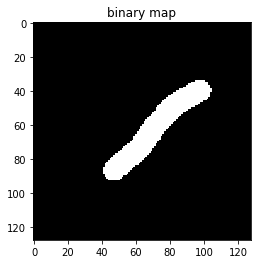

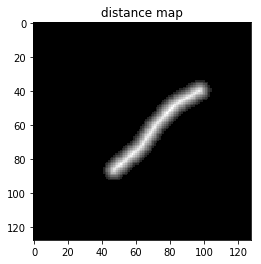

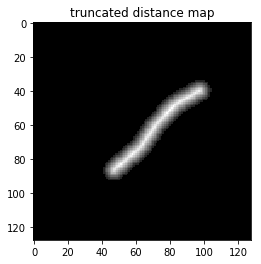

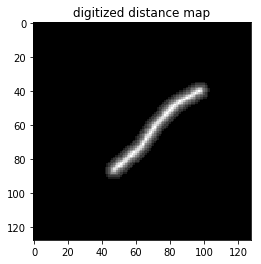

[0 1 2 3 4 5 6 7 8 9]


In [19]:
mask = load_mask(110)
bins = np.array([1,2,3,4,4.5, 5,5.5,6,6.5])
quan_dist_in = create_distance_map(mask, bins, plot=True, R=20)
print(np.unique(quan_dist_in))

('dst:', 0.0, 87.11486669908874)
('trun_dst:', 0.0, 24.0)
('unique:', array([0, 1, 2, 3, 4, 5]))


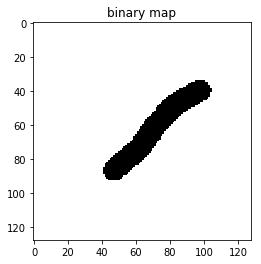

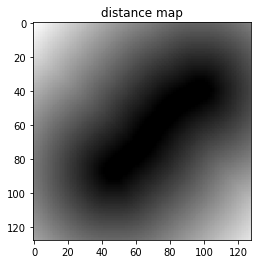

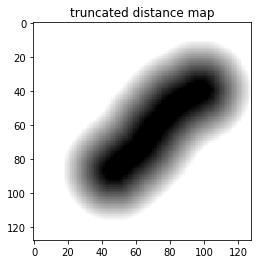

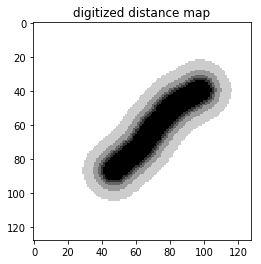

[0 1 2 3 4 5]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
bins = np.array([0.0, 1.5, 3, 6, 12])

quan_dist_out = 5 - create_distance_map(1-mask, bins, plot=True, R=24)
print(np.unique(quan_dist_out))
print(quan_dist_out)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 2 3 4 5]


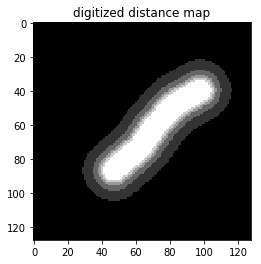

In [9]:
plt.title('digitized distance map')
frame3 = plt.imshow(quan_dist_out,cmap='gray')
print(quan_dist_out)
print(np.unique(quan_dist_out))

[0 1 2 3 4 5 6 7 8]


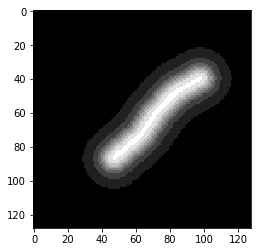

In [10]:
new_dist_mask = np.where(quan_dist_out==5, quan_dist_in+4, quan_dist_out)
frame3 = plt.imshow(new_dist_mask,cmap='gray')
print(np.unique(new_dist_mask))

In [20]:
def save_dst_mask(i):
    filename = masks_files[i]
    print(filename)
    mask = load_mask(i)
    bins = np.array([1,2,3,4,4.5, 5,5.5,6,6.5])
    dst = create_distance_map(mask, bins,R=20)
    print(np.unique(dst))
    savefile = os.path.join(save_dir, filename)
#     print(savefile)
    np.save(savefile, dst)

In [21]:
save_dst_mask(110)

017_068.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]


In [5]:
def save_dst_mask_8(i):
    filename = masks_files[i]
    print(filename)
    mask = load_mask(i)
    
    bins = np.array([0.0, 1.5, 3.0, 5.5])
    quan_dist_in = create_distance_map(mask, bins, plot=False, R=10)
    print(np.unique(quan_dist_in))
    bins = np.array([0.0, 1.5, 3, 6, 12])
    quan_dist_out = 5 - create_distance_map(1-mask, bins, plot=False, R=24)
    print(np.unique(quan_dist_out))
    new_dist_mask = np.where(quan_dist_out==5, quan_dist_in+4, quan_dist_out)
    print(np.unique(new_dist_mask))
    savefile = os.path.join(save_dir, filename)
#     print(savefile)
    np.save(savefile, new_dist_mask)

In [22]:
save_dst_mask_8(110)

017_068.npy
('dst:', 0.0, 7.0710678118654755)
('trun_dst:', 0.0, 7.0710678118654755)
[0 1 2 3 4]
('dst:', 0.0, 87.11486669908874)
('trun_dst:', 0.0, 24.0)
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7 8]


# Run it

In [22]:
save_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_masks_10m10c'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [23]:
for i in range(len(masks_files)):
    save_dst_mask(i)

001_044.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
001_047.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
002_037.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
002_051.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
003_037.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
003_041.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
003_045.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 7.615773105863909
[0 1 2 3 4 5 6 7 8 9]
003_046.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 7.615773105863909
[0 1 2 3 4 5 6 7 8 9]
004_032.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
004_043.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
004_045.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
004_046.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
005_034.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
005_045.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
005_046.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
005_052.npy

dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
020_076.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
020_081.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
021_020.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
021_021.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
021_022.npy
dst: 0.0 11.180339887498949
trun_dst: 0.0 11.180339887498949
[0 1 2 3 4 5 6 7 8 9]
021_035.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
021_038.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
021_050.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
021_057.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
021_059.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
021_061.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
021_075.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
021_076.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
021_077.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
021_084

029_082.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
030_022.npy
dst: 0.0 11.313708498984761
trun_dst: 0.0 11.313708498984761
[0 1 2 3 4 5 6 7 8 9]
030_023.npy
dst: 0.0 11.313708498984761
trun_dst: 0.0 11.313708498984761
[0 1 2 3 4 5 6 7 8 9]
030_024.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
030_031.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
030_040.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
030_041.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
030_042.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
030_044.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
030_048.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
030_060.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
030_065.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
030_070.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
030_072.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
030_074.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
030_083.npy
dst: 0.0 0.0


dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
044_037.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
044_038.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
044_042.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
044_043.npy
dst: 0.0 13.0
trun_dst: 0.0 13.0
[0 1 2 3 4 5 6 7 8 9]
044_052.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
044_085.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
045_015.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
045_016.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
045_037.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
045_038.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
045_060.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
045_061.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
045_063.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
045_078.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
045_083.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
045_088.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
046

056_057.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
056_070.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
056_071.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
056_085.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
056_089.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
056_095.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
057_022.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
057_045.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 7.615773105863909
[0 1 2 3 4 5 6 7 8 9]
057_046.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 7.615773105863909
[0 1 2 3 4 5 6 7 8 9]
057_047.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
057_048.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
057_049.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
057_052.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
057_059.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
057_064.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
057_070.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
057_07

068_050.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
068_052.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
068_073.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 8.54400374531753
[0 1 2 3 4 5 6 7 8 9]
068_074.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
068_089.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
068_091.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
068_092.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
068_093.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
068_095.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
068_101.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
069_016.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
069_043.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
069_049.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
069_066.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
069_073.npy
dst: 0.0 9.055385138137417
trun_dst: 0.0 9.055385138137417
[0 1 2 3 4 5 6 7 8 9]
069_074.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
069_075.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
069_087.npy
dst: 0.0 0.0
tr

077_060.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
077_066.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
077_074.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
077_076.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
077_077.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
077_078.npy
dst: 0.0 8.48528137423857
trun_dst: 0.0 8.48528137423857
[0 1 2 3 4 5 6 7 8 9]
077_082.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
077_083.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
077_091.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
077_092.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
077_093.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
077_094.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
077_095.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
077_097.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
077_102.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
077_106.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
077_11

dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
086_065.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
086_083.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
086_086.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
086_087.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
086_088.npy
dst: 0.0 8.48528137423857
trun_dst: 0.0 8.48528137423857
[0 1 2 3 4 5 6 7 8 9]
086_100.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_018.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_022.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_039.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_047.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_058.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_059.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_060.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_066.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_068.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_072.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_080.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
087_087.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.8

dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
095_079.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
095_081.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
095_084.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
095_089.npy
dst: 0.0 8.06225774829855
trun_dst: 0.0 8.06225774829855
[0 1 2 3 4 5 6 7 8 9]
095_090.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
095_091.npy
dst: 0.0 10.44030650891055
trun_dst: 0.0 10.44030650891055
[0 1 2 3 4 5 6 7 8 9]
095_092.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
095_094.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
095_100.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
095_101.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
095_113.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
096_029.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
096_030.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
096_036.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
096_038.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
096_039.

107_015.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
107_016.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
107_030.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
107_047.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
107_057.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
107_062.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
107_080.npy
dst: 0.0 9.848857801796104
trun_dst: 0.0 9.848857801796104
[0 1 2 3 4 5 6 7 8 9]
107_081.npy
dst: 0.0 9.848857801796104
trun_dst: 0.0 9.848857801796104
[0 1 2 3 4 5 6 7 8 9]
107_086.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
107_093.npy
dst: 0.0 6.708203932499369
trun_dst: 0.0 6.708203932499369
[0 1 2 3 4 5 6 7 8 9]
107_095.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
107_096.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
107_097.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
107_101.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
107_111.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
107_112.n

dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
113_116.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
113_117.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
113_119.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_025.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_035.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_043.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_048.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_051.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_054.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_061.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_063.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_066.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_074.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_084.npy
dst: 0.0 13.0
trun_dst: 0.0 13.0
[0 1 2 3 4 5 6 7 8 9]
114_085.npy
dst: 0.0 13.0
trun_dst: 0.0 13.0
[0 1 2 3 4 5 6 7 8 9]
114_086.npy
dst: 0.0 10.198039027185569
trun_dst: 0.0 10.198039027185569
[0 1 2 3 4 5 6 7 8 9]
114_091.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_095.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
114_096.npy
dst: 0.0 8.0
trun_d

dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
122_082.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
122_083.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
122_093.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
122_094.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
122_097.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
122_108.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
122_125.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
122_126.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
123_017.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
123_018.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
123_019.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
123_027.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
123_031.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
123_042.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
123_053.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
123_054.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
123_064.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
123_065.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
123_067.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.071067811

trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
129_091.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
129_092.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
129_093.npy
dst: 0.0 9.433981132056603
trun_dst: 0.0 9.433981132056603
[0 1 2 3 4 5 6 7 8 9]
129_094.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
129_095.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
129_105.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
129_118.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
129_124.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
129_134.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
130_030.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
130_039.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
130_041.npy
dst: 0.0 9.219544457292887
trun_dst: 0.0 9.219544457292887
[0 1 2 3 4 5 6 7 8 9]
130_042.npy
dst: 0.0 9.219544457292887
trun_dst: 0.0 9.219544457292887
[0 1 2 3 4 5 6 7 8 9]
130_043.npy
dst: 0.0 12.041594578792296
trun_dst: 0.0 12.04159457

dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
136_096.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
136_100.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
136_113.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
136_115.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
136_122.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
136_133.npy
dst: 0.0 10.816653826391969
trun_dst: 0.0 10.816653826391969
[0 1 2 3 4 5 6 7 8 9]
136_134.npy
dst: 0.0 10.816653826391969
trun_dst: 0.0 10.816653826391969
[0 1 2 3 4 5 6 7 8 9]
137_036.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
137_045.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
137_073.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
137_075.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
137_079.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
137_115.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
137_123.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
137_125.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
137_130.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
137_133.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
137_134.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 

dst: 0.0 16.64331697709324
trun_dst: 0.0 16.64331697709324
[0 1 2 3 4 5 6 7 8 9]
144_063.npy
dst: 0.0 16.64331697709324
trun_dst: 0.0 16.64331697709324
[0 1 2 3 4 5 6 7 8 9]
144_064.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
144_065.npy
dst: 0.0 7.280109889280518
trun_dst: 0.0 7.280109889280518
[0 1 2 3 4 5 6 7 8 9]
144_066.npy
dst: 0.0 12.083045973594572
trun_dst: 0.0 12.083045973594572
[0 1 2 3 4 5 6 7 8 9]
144_081.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
144_082.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
144_083.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
144_084.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
144_085.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
144_086.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
144_097.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
144_100.npy
dst: 0

trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
148_063.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
148_074.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
148_075.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
148_076.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
148_077.npy
dst: 0.0 9.899494936611665
trun_dst: 0.0 9.899494936611665
[0 1 2 3 4 5 6 7 8 9]
148_078.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 7.615773105863909
[0 1 2 3 4 5 6 7 8 9]
148_079.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
148_080.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 9]
148_116.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
148_119.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
148_120.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
148_121.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
148_124.npy
dst: 0.0

154_073.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
154_077.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
154_089.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
154_105.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
154_106.npy
dst: 0.0 10.04987562112089
trun_dst: 0.0 10.04987562112089
[0 1 2 3 4 5 6 7 8 9]
154_107.npy
dst: 0.0 10.04987562112089
trun_dst: 0.0 10.04987562112089
[0 1 2 3 4 5 6 7 8 9]
154_108.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
154_113.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
154_130.npy
dst: 0.0 10.770329614269007
trun_dst: 0.0 10.770329614269007
[0 1 2 3 4 5 6 7 8 9]
154_131.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
154_132.npy
dst: 0.0 10.770329614269007
trun_dst: 0.0 10.770329614269007
[0 1 2 3 4 5 6 7 8 9]
155_044.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
155_045.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
155_050.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
155_056.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710

161_119.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
161_124.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
161_125.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
161_132.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
161_142.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
161_145.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
161_146.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
161_147.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
161_155.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
161_156.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
161_157.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
162_074.npy
dst: 0.0 2.0
trun_dst: 0.0 2.0
[0 1]
162_084.npy
dst: 0.0 1.0
trun_dst: 0.0 1.0
[0]
162_090.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
162_095.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
162_100.npy

dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
165_137.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
165_138.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
165_145.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
165_149.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
165_150.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
165_161.npy
dst: 0.0 13.0
trun_dst: 0.0 13.0
[0 1 2 3 4 5 6 7 8 9]
165_162.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
165_163.npy
dst: 0.0 12.529964086141668
trun_dst: 0.0 12.529964086141668
[0 1 2 3 4 5 6 7 8 9]
165_172.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
166_062.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
166_070.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
166_073.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
166_086.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
166_088.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
166_089.npy
dst: 0.0 0.0
trun_dst

170_140.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
170_141.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
170_164.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
170_169.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
170_170.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
170_175.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
171_049.npy
dst: 0.0 12.0
trun_dst: 0.0 12.0
[0 1 2 3 4 5 6 7 8 9]
171_050.npy
dst: 0.0 12.0
trun_dst: 0.0 12.0
[0 1 2 3 4 5 6 7 8 9]
171_051.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
171_058.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
171_100.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 8.54400374531753
[0 1 2 3 4 5 6 7 8 9]
171_101.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 8.54400374531753
[0 1 2 3 4 5 6 7 8 9]
171_104.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
171_105.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2

dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
175_051.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
175_052.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
175_053.npy
dst: 0.0 8.48528137423857
trun_dst: 0.0 8.48528137423857
[0 1 2 3 4 5 6 7 8 9]
175_054.npy
dst: 0.0 8.48528137423857
trun_dst: 0.0 8.48528137423857
[0 1 2 3 4 5 6 7 8 9]
175_057.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
175_058.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
175_059.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
175_066.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
175_070.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
175_071.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
175_077.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
175_085.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
175_089.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
175_092.npy
dst: 0.0 0

dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
178_130.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
178_131.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
178_133.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
178_140.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
178_143.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
178_144.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
178_145.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
178_156.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
178_161.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
178_167.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
178_168.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
178_169.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
178_171.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
178_184.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
178_187.npy
dst: 0.0 0.0
trun_dst: 0.0 0.

184_134.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
184_135.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
184_149.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
184_153.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
184_154.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
184_155.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
184_168.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
184_170.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
184_182.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
184_188.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
184_190.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
184_202.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
184_203.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
185_050.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
185_061.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
185_068.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
185_072.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
185_074.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
185_078.npy
dst: 0.0 0

189_210.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
190_056.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
190_073.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
190_080.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
190_081.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
190_084.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
190_085.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
190_087.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
190_103.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
190_104.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
190_105.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
190_126.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
190_127.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
190_137.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
190_159.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
190_160.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
190_166.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
190

195_124.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
195_132.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
195_133.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
195_155.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
195_159.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
195_169.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
195_205.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
195_206.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
195_213.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
196_072.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
196_073.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
196_075.npy
dst: 0.0 13.45362404707371
trun_dst: 0.0 13.45362404707371
[0 1 2 3 4 5 6 7 8 9]
196_076.npy
dst: 0.0 15.556349186104045
trun_dst: 0.0 15.556349186104045
[0 1 2 3 4 5 6 7 8 9]
196_077.npy
dst: 0.0 10.198039027185569
trun_dst: 0.0 10.198039027185569
[0 1 2 3 4 5 6 7 8 9]
196_078.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
196_084.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
196_086.npy
dst: 0.0 0.0

dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
201_111.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
201_114.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
201_115.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
201_116.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
201_120.npy
dst: 0.0 11.180339887498949
trun_dst: 0.0 11.180339887498949
[0 1 2 3 4 5 6 7 8 9]
201_121.npy
dst: 0.0 10.04987562112089
trun_dst: 0.0 10.04987562112089
[0 1 2 3 4 5 6 7 8 9]
201_122.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
201_141.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
201_185.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
201_186.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
201_190.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
201_202.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
201_209.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
201_216.npy
dst: 0.0 10.04987562112089
trun_dst: 0.0 10.04987562112089
[0 1 2 3 4 5 6 7 8 9]
201_217.npy

dst: 0.0 8.246211251235321
trun_dst: 0.0 8.246211251235321
[0 1 2 3 4 5 6 7 8 9]
205_134.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
205_135.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
205_137.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
205_138.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
205_139.npy
dst: 0.0 10.816653826391969
trun_dst: 0.0 10.816653826391969
[0 1 2 3 4 5 6 7 8 9]
205_163.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
205_175.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
205_186.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
205_202.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
205_203.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
205_204.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
205_209.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
205_216.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
205_225.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
205_230.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
206_083.npy
dst: 0.0 0.0
trun_dst: 0

211_174.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
211_180.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
211_195.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
211_202.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
211_203.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
211_209.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
211_210.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
211_214.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
211_233.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
211_234.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
211_244.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
212_101.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
212_103.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
212_110.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
212_112.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
212_116.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
212_121.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
212_131.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
212_

dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_162.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_182.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_188.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_191.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_200.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_201.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_206.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_209.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_219.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_228.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_241.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_247.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_262.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_264.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_265.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_266.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
217_268.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
218_118.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
218_139.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
218_151.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
218_155.npy
dst: 0.0 10.0

222_215.npy
dst: 0.0 12.0
trun_dst: 0.0 12.0
[0 1 2 3 4 5 6 7 8 9]
222_223.npy
dst: 0.0 8.06225774829855
trun_dst: 0.0 8.06225774829855
[0 1 2 3 4 5 6 7 8 9]
222_224.npy
dst: 0.0 8.06225774829855
trun_dst: 0.0 8.06225774829855
[0 1 2 3 4 5 6 7 8 9]
222_225.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
222_226.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
222_231.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
222_236.npy
dst: 0.0 7.280109889280518
trun_dst: 0.0 7.280109889280518
[0 1 2 3 4 5 6 7 8 9]
222_237.npy
dst: 0.0 7.280109889280518
trun_dst: 0.0 7.280109889280518
[0 1 2 3 4 5 6 7 8 9]
222_252.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
222_258.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
222_259.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
222_260.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
222_272.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
222_281.npy
dst: 0.0 0.0
tr

225_191.npy
dst: 0.0 9.055385138137417
trun_dst: 0.0 9.055385138137417
[0 1 2 3 4 5 6 7 8 9]
225_192.npy
dst: 0.0 9.055385138137417
trun_dst: 0.0 9.055385138137417
[0 1 2 3 4 5 6 7 8 9]
225_193.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
225_195.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
225_198.npy
dst: 0.0 8.06225774829855
trun_dst: 0.0 8.06225774829855
[0 1 2 3 4 5 6 7 8 9]
225_199.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 8.54400374531753
[0 1 2 3 4 5 6 7 8 9]
225_202.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 7.615773105863909
[0 1 2 3 4 5 6 7 8 9]
225_203.npy
dst: 0.0 8.54400374531753
trun_dst: 0.0 8.54400374531753
[0 1 2 3 4 5 6 7 8 9]
225_206.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
225_220.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
225_225.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
225_226.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
225_238.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
225_2

dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
227_191.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
227_192.npy
dst: 0.0 12.0
trun_dst: 0.0 12.0
[0 1 2 3 4 5 6 7 8 9]
227_193.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
227_194.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
227_195.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
227_196.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
227_197.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 7.615773105863909
[0 1 2 3 4 5 6 7 8 9]
227_198.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
227_202.npy
dst: 0.0 9.055385138137417
trun_dst: 0.0 9.055385138137417
[0 1 2 3 4 5 6 7 8 9]
227_203.npy
dst: 0.0 9.055385138137417
trun_dst: 0.0 9.055385138137417
[0 1 2 3 4 5 6 7 8 9]
227_204.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
227_205.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
227_209.npy
dst: 0.0 8.0
trun_dst: 0.0 8.

229_154.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
229_155.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
229_157.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
229_158.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
229_162.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
229_165.npy
dst: 0.0 12.0
trun_dst: 0.0 12.0
[0 1 2 3 4 5 6 7 8 9]
229_166.npy
dst: 0.0 9.219544457292887
trun_dst: 0.0 9.219544457292887
[0 1 2 3 4 5 6 7 8 9]
229_167.npy
dst: 0.0 12.806248474865697
trun_dst: 0.0 12.806248474865697
[0 1 2 3 4 5 6 7 8 9]
229_180.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
229_181.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
229_185.npy
dst: 0.0 8.602325267042627
trun_dst: 0.0 8.602325267042627
[0 1 2 3 4 5 6 7 8 9]
229_186.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
229_187.npy
dst: 0.0 10.440306

trun_dst: 0.0 0.0
[0]
230_246.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
230_247.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
230_248.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
230_255.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
230_256.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
230_271.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
230_276.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
230_277.npy
dst: 0.0 9.0
trun_dst: 0.0 9.0
[0 1 2 3 4 5 6 7 8 9]
230_278.npy
dst: 0.0 8.06225774829855
trun_dst: 0.0 8.06225774829855
[0 1 2 3 4 5 6 7 8 9]
230_280.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
230_281.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
230_284.npy
dst: 0.0 9.899494936611665
trun_dst: 0.0 9.899494936611665
[0 1 2 3 4 5 6 7 8 9]
230_285.npy
dst: 0.0 9.899494936611665
trun_dst: 0.0 9.899494936611665
[0 1 2 3 4 5 6 7 8 9]
230_286.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.21110255

234_205.npy
dst: 0.0 3.1622776601683795
trun_dst: 0.0 3.1622776601683795
[0 1 2 3]
234_206.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
234_207.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
234_208.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
234_209.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
234_210.npy
dst: 0.0 12.041594578792296
trun_dst: 0.0 12.041594578792296
[0 1 2 3 4 5 6 7 8 9]
234_211.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
234_212.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
234_213.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
234_221.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
234_222.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
234_226.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
234_227.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
234_229.npy
dst: 0.0 8.246211251235321
trun_dst: 0.0 8.246211251235321
[0 1 2 3 4 5 6 7 8 9]
234_230.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
234_231.npy
dst

dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
237_224.npy
dst: 0.0 11.0
trun_dst: 0.0 11.0
[0 1 2 3 4 5 6 7 8 9]
237_225.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
237_226.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 8.94427190999916
[0 1 2 3 4 5 6 7 8 9]
237_230.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
237_231.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
237_232.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
237_233.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
237_236.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
237_242.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
237_243.npy
dst: 0.0 7.615773105863909
trun_dst: 0.0 7.615773105863909
[0 1 2 3 4 5 6 7 8 9]
237_244.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 

dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
240_277.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
240_285.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
240_297.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 8.94427190999916
[0 1 2 3 4 5 6 7 8 9]
240_298.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 8.94427190999916
[0 1 2 3 4 5 6 7 8 9]
240_300.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
240_301.npy
dst: 0.0 7.0710678118654755
trun_dst: 0.0 7.0710678118654755
[0 1 2 3 4 5 6 7 8 9]
240_303.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
241_215.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
241_218.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
241_222.npy
dst: 0.0 8.48528137423857
trun_dst: 0.0 8.48528137423857
[0 1 2 3 4 5 6 7 8 9]
241_223.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
241_224.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
241_229.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.21110255

246_231.npy
dst: 0.0 8.48528137423857
trun_dst: 0.0 8.48528137423857
[0 1 2 3 4 5 6 7 8 9]
246_232.npy
dst: 0.0 12.36931687685298
trun_dst: 0.0 12.36931687685298
[0 1 2 3 4 5 6 7 8 9]
246_233.npy
dst: 0.0 12.36931687685298
trun_dst: 0.0 12.36931687685298
[0 1 2 3 4 5 6 7 8 9]
246_234.npy
dst: 0.0 7.810249675906654
trun_dst: 0.0 7.810249675906654
[0 1 2 3 4 5 6 7 8 9]
246_235.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
246_236.npy
dst: 0.0 10.0
trun_dst: 0.0 10.0
[0 1 2 3 4 5 6 7 8 9]
246_237.npy
dst: 0.0 8.602325267042627
trun_dst: 0.0 8.602325267042627
[0 1 2 3 4 5 6 7 8 9]
246_241.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
246_242.npy
dst: 0.0 7.0
trun_dst: 0.0 7.0
[0 1 2 3 4 5 6 7 8 9]
246_243.npy
dst: 0.0 16.97056274847714
trun_dst: 0.0 16.97056274847714
[0 1 2 3 4 5 6 7 8 9]
246_244.npy
dst: 0.0 10.198039027185569
trun_dst: 0.0 10.198039027185569
[0 1 2 3 4 5 6 7 8 9]
246_246.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
246_249.npy
dst: 0.0 7.0
trun_dst: 0.0

[0 1 2 3 4 5 6 7 8 9]
250_286.npy
dst: 0.0 7.211102550927978
trun_dst: 0.0 7.211102550927978
[0 1 2 3 4 5 6 7 8 9]
250_287.npy
dst: 0.0 8.94427190999916
trun_dst: 0.0 8.94427190999916
[0 1 2 3 4 5 6 7 8 9]
250_292.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
250_293.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
250_303.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
251_229.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
251_235.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
251_238.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
251_276.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
251_291.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
251_295.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
252_234.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
252_244.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
252_251.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
252_271.npy
dst: 0.0 8.0
trun_dst: 0.0 8.0
[0 1 2 3 4 5 6 7 8 9]
252_272.npy
dst: 0.0 8.602325267042627
trun_dst: 0.0 8.602325267042627
[0 1 2 3 4 5 6 7 8 9]
252_273.npy
dst: 0.0 8.602325267042627
trun_dst: 0.0 8.602325267042627
[

260_269.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
260_274.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
261_273.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]
261_281.npy
dst: 0.0 0.0
trun_dst: 0.0 0.0
[0]


# Codes

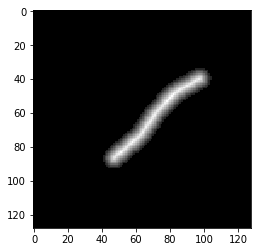

In [151]:
#distanceTransformation
from scipy import ndimage
dst = ndimage.distance_transform_edt(mask)
plt.imshow(dst,cmap='gray')

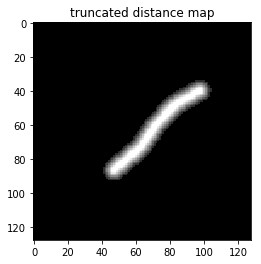

In [153]:
#Truncate it use Threshold R
R = 5.5
trun_dst = np.where(dst>R, R, dst)
plt.title('truncated distance map')
plt.imshow(trun_dst,cmap='gray')

In [146]:
print(np.min(dst),np.max(dst))
print(np.min(trun_dst),np.max(trun_dst))

0.0 7.0710678118654755
0.0 5.5


[0 1 2 3 4]


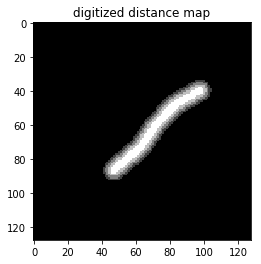

In [155]:
bins = np.array([0.0, 1.5, 3.0, 4.5,7])
quan_dist = np.digitize(trun_dst, bins, right=True)
plt.title('digitized distance map')
plt.imshow(quan_dist,cmap='gray')
print(np.unique(quan_dist))

In [10]:
a = np.array([[1,2],[3,4]])
mask = np.eye(5)[a]

In [12]:
print(mask.shape)

(2, 2, 5)
